In [1]:
# Script to calculate total citation each patent made and received
# Backward citation - citation made by a patent
# Forward citation - citation received by a patent

# Renato Kogeyama

# Oct 08 2019
# Miami

#From 91,453,297 citations ids, 178,514 are larger or smaller than the majority 7-digit ids
#This represent less than 0.2% of total citations
#Two main reasons - citation_id is old (thus patents had less than 7 digits) 
#or citation is represented by the application number (typically much larger)
#As the number is small, I will go on with the current set and if necessary I'll come back later.
#This file is being renamed from 'uspto_citations_clean-sandbox-Copy1' to 'patent_citation'


# Oct 03 2019
# New York

# The function group_values do not work because it only counts the occurrences of the patents
# The correction is to groupby and sum
# Histograms of forward and should be different, but the number of occurrences should be the same
# Also, averages should be the same (avg_fwr==avg_back=sum(x)/num(x) and standard deviations should be different (due sum(x^2)/num)

# Oct 02 2019
# Syracuse

#This is a sandbox version for the citations update
#I identified an issue with the citations, and now I am working in a new citations dataset
#I included backward citations and I am planning some basic stats 


# Sep 28 2019
# Miami

# Original:testing_csv_chunk_read-Copy1.ipynb

# When working on the determinants of patent citation, I found a weird concentration of 14 citations in patents from 2003
# Most likely there is some issue with the 'join' statement
# This code is helping me debbuggin the issue
# The idea is to isolate the patents who had this number of citations
# To do that, I face an issue of memory size, the file is too large and memory runs out
# I use the iterator option from pandas.read_csv, what gives me an iterator in the place of the dataframe


# update: as I read the files, I find many whitespaces
# usually i would clean with .str.strip(), but I am using an iterator.

# Ha um problema no arquivo de citacoes. Estou reescrevendo o codigo que junta as citacoes a tabela base de patentes
# Estou tambem acrescentando backward citation - a intencao eh usar da mesma forma que claims e tambem para salientar o significado das forward citations
# Porem carregar o arquivo inteiro na memoria nao esta funcionado

# Quando o Marcelo escreveu o codig lxml, tudo foi feito com iterators
# Nao estou conseguindo testar por algum problema no servidor

# Assim, o que vou fazer agora eh selecionar um chunk para trabalhar localmente


In [2]:
import pandas as pd
import random
from collections import Counter
import matplotlib.pyplot as plt
# import json

# import csv

In [3]:
# class ItemLoader(ItemLoader):

#     default_output_processor = MapCompose(unicode.strip)

In [4]:
%matplotlib inline

In [5]:
fname = r'/home/rkogeyam/PATENT_CITATION/uspatentcitation.tsv'
dst = '/home/rkogeyam/PATENT_CITATION/fwd_back_cit.csv'

In [6]:
# To run a sample

# n = sum(1 for line in open(fname)) - 1 #number of records in file (excludes header)
n=91867780

s = 10000 #desired sample size
# skip = sorted(random.sample(range(1,n+1),n-s)) #the 0-indexed header will not be included in the skip list
# df = pd.read_csv(fname, skiprows=skip, sep='\t', lineterminator='\n', na_values='-')

In [7]:
#To run complete
df = pd.read_csv(fname, sep='\t', lineterminator='\n', na_values='-')

In [8]:
# asg = pd.read_csv(r'/home/rkogeyam/PATENT_CITATION/uspatentcitation.tsv', sep='\t', lineterminator='\n', na_values='-')

In [9]:
# df.to_csv('/home/rkogeyam/PATENT_CITATION/fwd_back_cit.csv')

In [10]:
# df=pd.read_csv('/home/rkogeyam/PATENT_CITATION/sample_fwd_back_cit.csv')

In [11]:
df=df.iloc[:,1:]

In [12]:
df.describe()

,sequence
count,9.145330e+07
mean,6.672389e+01
std,1.764092e+02
min,0.000000e+00
25%,4.000000e+00
50%,1.200000e+01
75%,5.000000e+01
max,5.840000e+03


In [13]:
df.head()

,patent_id,citation_id,date,name,kind,country,category,sequence
0,9009250,8127342,2012-02-01,Boynton et al.,B2,US,cited by applicant,622
1,9643605,5471515,1995-11-01,Fossum et al.,A,US,cited by applicant,413
2,5354551,4875247,1989-10-01,Berg,NaN,US,NaN,11
3,D786922,D718330,2014-11-01,Shin,S,US,cited by examiner,11
4,D490798,D190749,1961-06-01,Matri et al.,S,US,cited by examiner,1


In [14]:
#stripping white spaces
# df['patent_id'] = df1['patent_id'].str.strip()
# df['citation_id'] = df1['citation_id'].str.strip()

In [15]:
# df1=df

In [16]:
df.shape

(91453297, 8)

In [17]:
#stripping non desired characters
df['patent_id'] = df['patent_id'].str.extract('([a-zA-Z0-9]+)', expand=False)
df['citation_id'] = df['citation_id'].str.extract('([a-zA-Z0-9]+)', expand=False)

In [18]:
df['patent_id'] = df['patent_id'].str.strip()
df['citation_id'] = df['citation_id'].str.strip()
# [a-fA-F0-9]

In [19]:
# ne = (df != df1).any(1)
# ne_stacked = (df != df1).stack()
# changed = ne_stacked[ne_stacked]
# changed.index.names = ['id', 'col']
# changed

In [20]:
df.head()

,patent_id,citation_id,date,name,kind,country,category,sequence
0,9009250,8127342,2012-02-01,Boynton et al.,B2,US,cited by applicant,622
1,9643605,5471515,1995-11-01,Fossum et al.,A,US,cited by applicant,413
2,5354551,4875247,1989-10-01,Berg,NaN,US,NaN,11
3,D786922,D718330,2014-11-01,Shin,S,US,cited by examiner,11
4,D490798,D190749,1961-06-01,Matri et al.,S,US,cited by examiner,1


In [21]:
df.tail()

,patent_id,citation_id,date,name,kind,country,category,sequence
91453292,9829282,7281600,2007-10-01,Chernoff et al.,B2,US,cited by applicant,13
91453293,9822033,5424029,1995-06-01,Kennedy,A,US,cited by examiner,12
91453294,9798759,5870758,1999-02-01,Bamford et al.,A,US,cited by applicant,4
91453295,9845909,4632433,1986-12-01,Kimura,A,US,cited by applicant,31
91453296,9841183,4036716,1977-07-01,Hulthe,A,US,cited by examiner,17


In [22]:
df.sort_values('patent_id')

,patent_id,citation_id,date,name,kind,country,category,sequence
55748086,3930271,2379430,1945-07-01,Frost,NaN,US,NaN,0
88405776,3930271,2782422,1957-02-01,Bencriscutto,NaN,US,NaN,1
85438079,3930272,1609246,1926-11-01,Hamburger,NaN,US,NaN,2
25799113,3930272,1549144,1925-08-01,Messegee,NaN,US,NaN,1
37961642,3930272,2711301,1955-06-01,Jaspersen,NaN,US,NaN,8
40080576,3930272,2574559,1951-11-01,Graf et al.,NaN,US,NaN,7
17866568,3930272,2545289,1951-03-01,Lang,NaN,US,NaN,5
55294986,3930272,3670344,1972-06-01,Boudreau,NaN,US,NaN,10
66015656,3930272,2734200,1956-02-01,Kedrowski,NaN,US,NaN,9
41996970,3930272,1834468,1931-12-01,Mayette,NaN,US,NaN,4


In [23]:
# df1.tail()

In [24]:
# forward_citation=df.groupby(['patent_id']).count().reset_index()
forward_citation=df.groupby(['patent_id']).count().iloc[:, 1]

In [25]:
forward_citation

patent_id
3930271      2
3930272     11
3930273      8
3930274      3
3930275      2
3930276      2
3930277      3
3930278      8
3930279      3
3930280      4
3930281      6
3930282      8
3930283     10
3930284      2
3930285     11
3930286      8
3930287      5
3930288      8
3930289      4
3930290      8
3930291     11
3930292      2
3930293      6
3930294      5
3930295      4
3930296      9
3930297      5
3930298     11
3930299      2
3930300      8
          ... 
RE46622      1
RE46623     11
RE46624      1
RE46625    153
RE46626    153
RE46627     18
RE46628      1
RE46629     10
RE46630      1
RE46631      1
RE46632     30
RE46633      4
RE46634      2
RE46635      8
RE46637    136
RE46638     39
RE46639      3
RE46640      9
RE46641      1
RE46643     51
RE46644      5
RE46645    422
RE46646     70
RE46647    128
RE46648     27
RE46649      8
RE46650     81
RE46651     68
RE46652     12
RE46653     32
Name: date, dtype: int64

In [26]:
forward_citation=forward_citation.fillna(0)

In [27]:
forward_citation.describe()

count    6.188752e+06
mean     1.477734e+01
std      4.195242e+01
min      1.000000e+00
25%      4.000000e+00
50%      7.000000e+00
75%      1.300000e+01
max      5.811000e+03
Name: date, dtype: float64

In [28]:
backward_citation=df.groupby(['citation_id']).count().iloc[:, 1]

In [29]:
#to find weird ids - backward citation only

#bigger citation ids are generally application numbers
backward_citation_big=df[df['citation_id'].str.len() > 8 ]

#many small citation id are citation of very old patents
backward_citation_small=df[df['citation_id'].str.len() < 6 ]


In [30]:
backward_citation_big

,patent_id,citation_id,date,name,kind,country,category,sequence
1124,6854492,20010025668,2001-10-01,Enge,A1,US,cited by other,5
4990,6862552,20020034191,2002-03-01,Shattil,A1,US,cited by examiner,0
11196,6868406,20010055388,2001-12-01,"Kaliski, Jr.",A1,US,cited by other,88
12349,6841954,20020141102,2002-10-01,Kusumoto,A1,US,cited by examiner,7
12546,6861977,20030052814,2003-03-01,Corbrion et al.,A1,US,cited by examiner,2
13597,6875124,20030078112,2003-04-01,Sugimoto,A1,US,cited by examiner,21
17134,6837425,20010011247,2001-08-01,O'Flaherty et al.,A1,US,cited by other,105
18730,6869594,20020141958,2002-10-01,Maio et al.,A1,US,cited by other,177
21090,6848733,20020140247,2002-10-01,Emery,A1,US,cited by examiner,23
23324,6877564,20030178199,2003-09-01,Deaton,A1,US,cited by examiner,31


In [31]:
backward_citation_small

,patent_id,citation_id,date,name,kind,country,category,sequence
1115,6834474,2002,2002-07-01,Dobreski et al.,A1,US,cited by other,192
3978,D474084,2001,2001-08-01,Gilley et al.,A1,US,cited by examiner,26
4915,6738820,2002,2002-03-01,Rakib,A1,US,cited by examiner,5
5011,6679612,2003,2003-01-01,Nielsen et al.,A1,US,cited by examiner,11
5183,6614073,2002,2002-05-01,Iwamuro et al.,A1,US,cited by examiner,18
6217,6622391,2002,2002-10-01,Kenjo et al.,A1,US,cited by examiner,29
6363,8316994,1943,1841-01-01,Welsh et al.,A,US,cited by examiner,0
7691,6809520,2002,2002-03-01,Guo et al.,A1,US,cited by other,13
8635,4903363,56697,1866-07-01,Bronn,NaN,US,NaN,0
10455,6822677,2001,2001-07-01,Kihara et al .,A1,US,cited by examiner,9


In [ ]:
#41579 small and 136935 large citation_ids (total=178514 citations) from 91453297 citations represent 0.2% of citations
#for this reason, I am ignoring these errors for now

In [32]:
result = pd.concat([forward_citation, backward_citation], axis=1, join='outer')

In [33]:
result.columns=['forward_citation', 'backward_citation']

In [34]:
result=result.fillna(0)

In [35]:
result

,forward_citation,backward_citation
0,0.0,8.0
0000000,0.0,1.0
000004,0.0,1.0
000006,0.0,1.0
0000482,0.0,1.0
0000H94,0.0,1.0
0001552,0.0,3.0
000169,0.0,3.0
000280,0.0,1.0
000312,0.0,1.0


In [36]:
result.head()

,forward_citation,backward_citation
0,0.0,8.0
0000000,0.0,1.0
000004,0.0,1.0
000006,0.0,1.0
0000482,0.0,1.0


In [37]:
result.describe()

,forward_citation,backward_citation
count,8.482460e+06,8.482460e+06
mean,1.078146e+01,1.078146e+01
std,3.643036e+01,3.320508e+01
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,1.000000e+00
50%,4.000000e+00,3.000000e+00
75%,1.000000e+01,1.000000e+01
max,5.811000e+03,4.316900e+04


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2e23352da0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f2b98968a58>]], dtype=object)

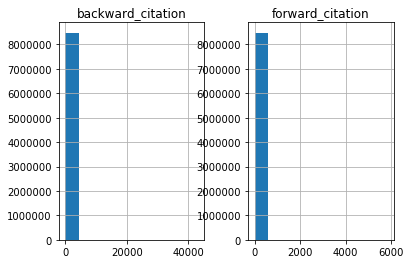

In [38]:
plt.figure()
result.hist()

/home/applications/anaconda3/4.2.0/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x7f2bfbe77ba8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2bfd7e8f60>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2bff48feb8>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f2bfe89ffd0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f2bfbe77e10>,
  <matplotlib.lines.Line2D at 0x7f2c01504780>]}

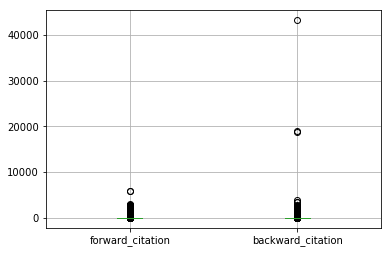

In [39]:
result.boxplot()

In [40]:
result.to_csv(dst)